In [11]:
from sklearn import datasets

iris = datasets.load_iris()
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [9]:
import pandas as pd

df = pd.DataFrame({
    'sepal length (cm)': iris.data[:, 0],
    'sepal width (cm)': iris.data[:, 1],
    'petal length (cm)': iris.data[:, 2],
    'petal width (cm)': iris.data[:, 3],
    'target': iris.target
})
df['name'] = df.target.apply(lambda x: iris.target_names[x])
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


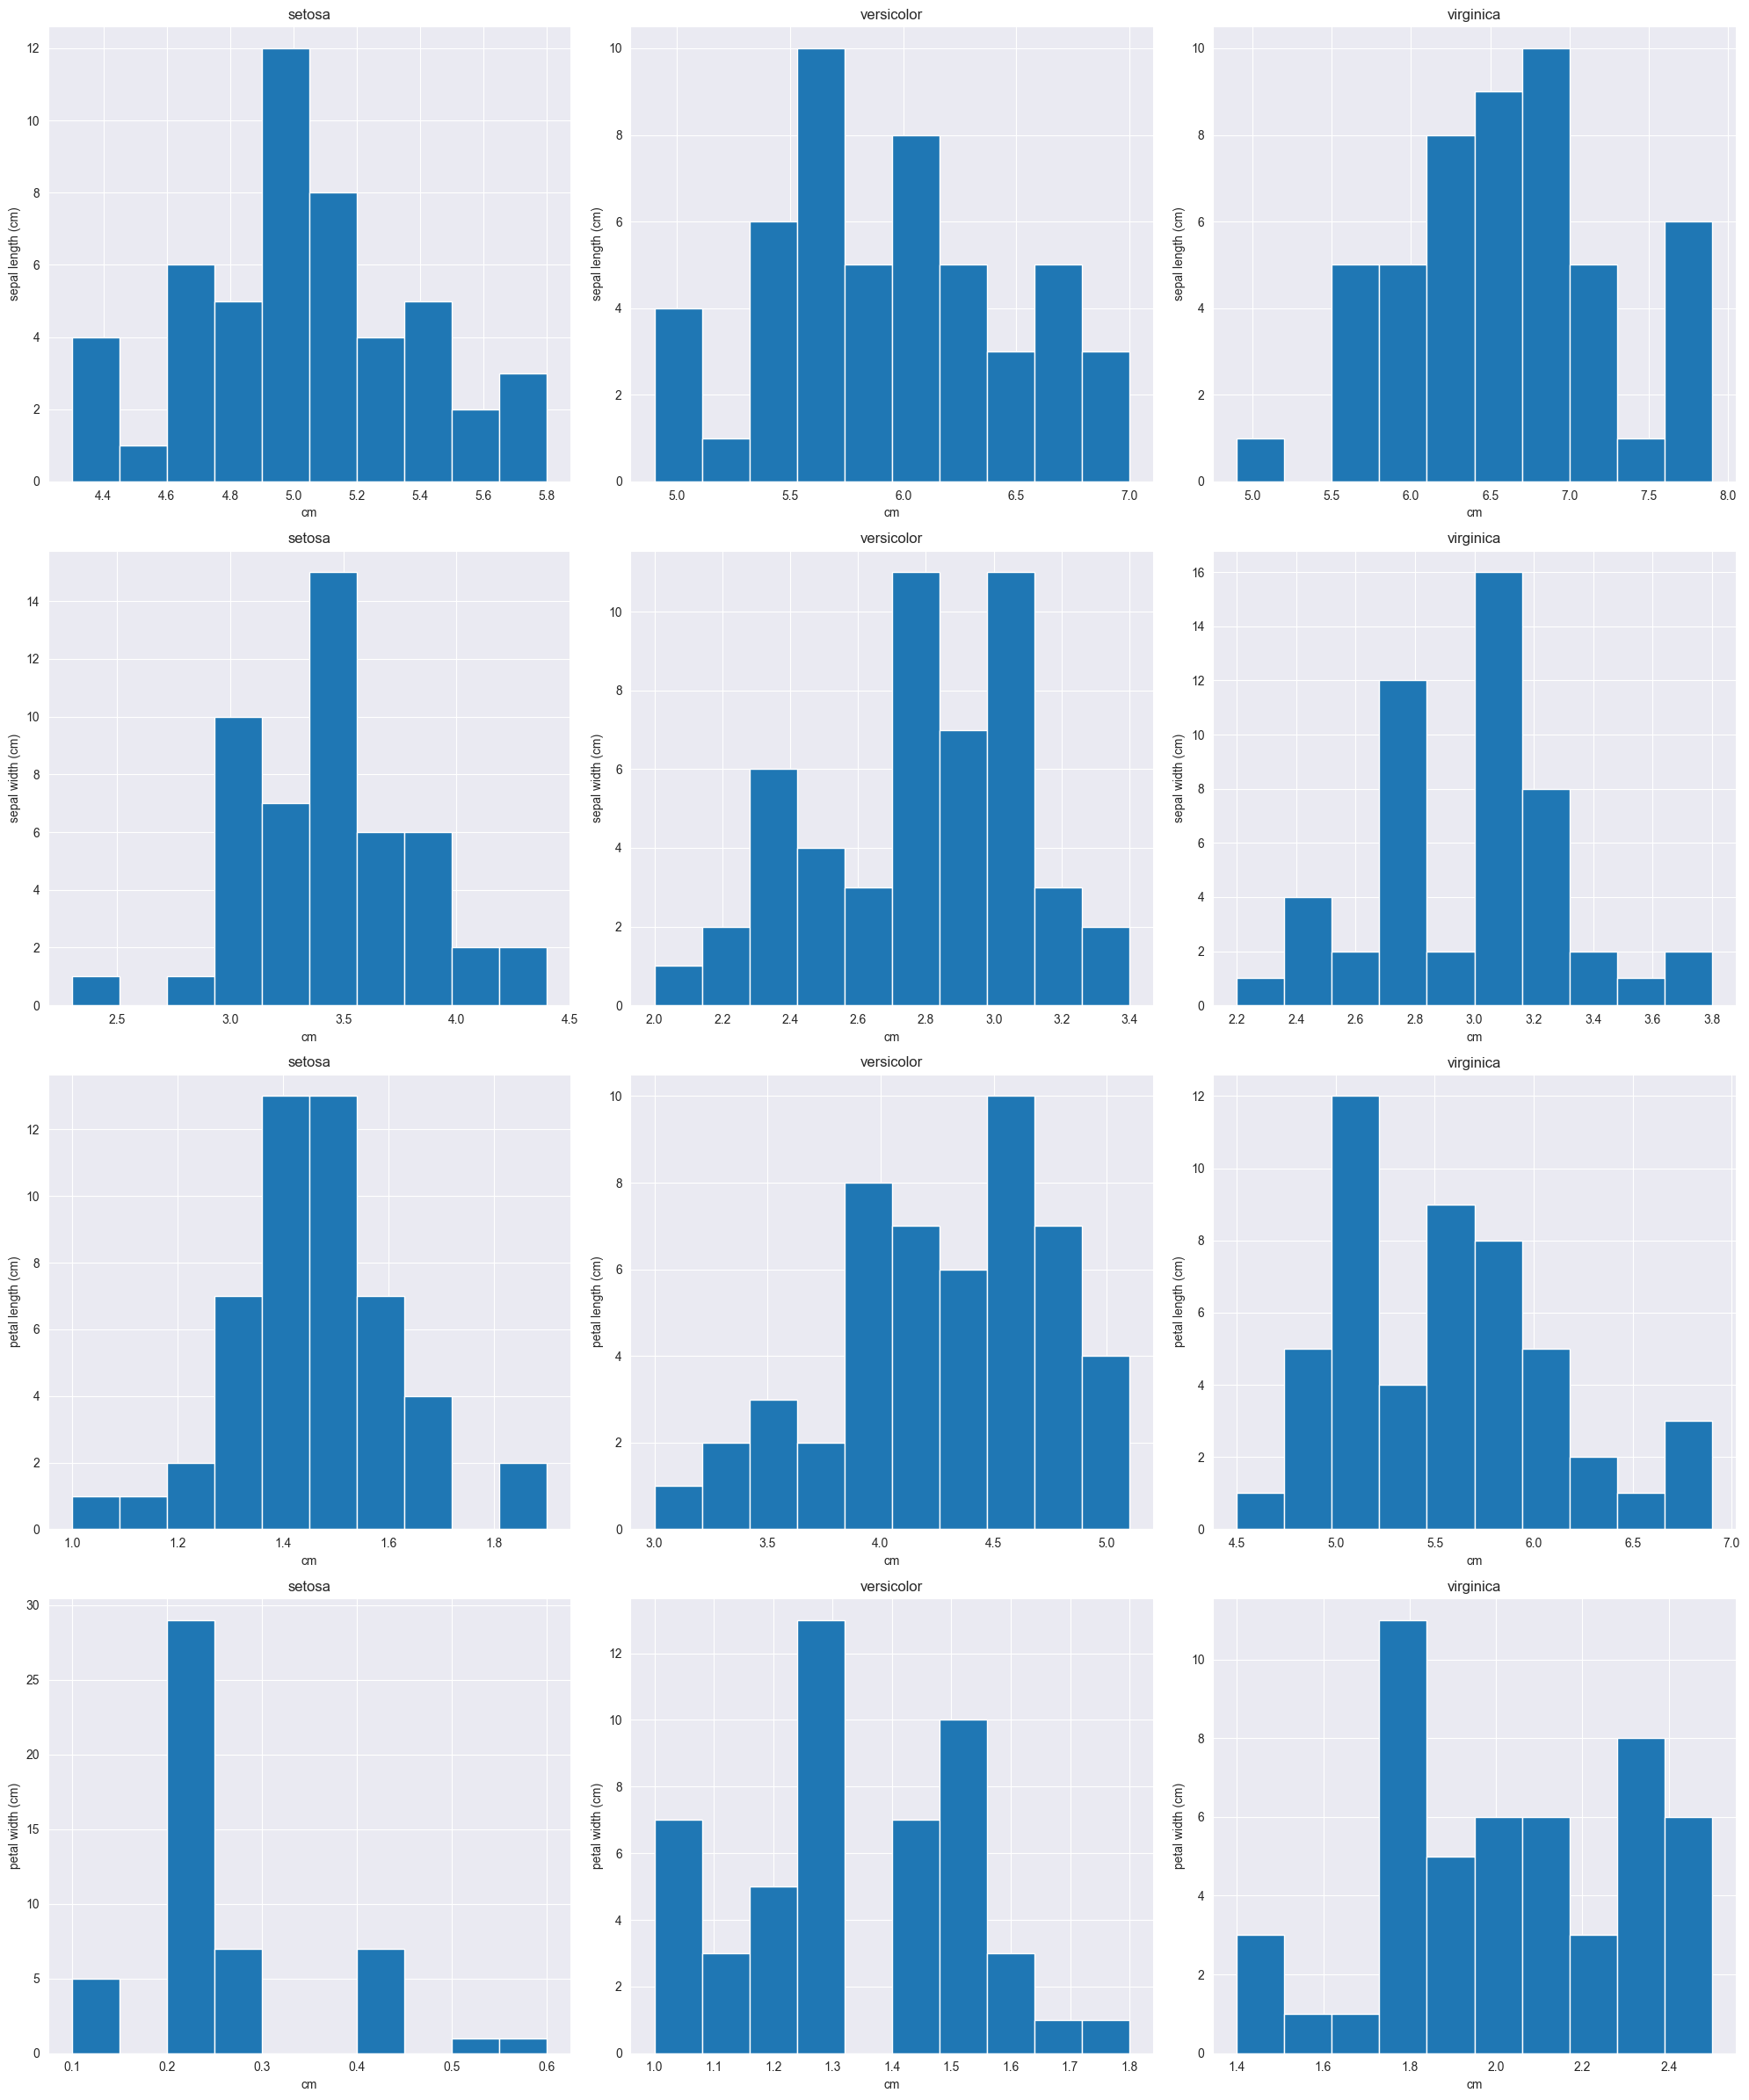

In [10]:
from matplotlib import pyplot as plt

plot_num = 0
plt.figure(figsize=(20, 24))
for feature_name in iris.feature_names:
    for target_name in iris.target_names:
        plot_num += 1
        plt.subplot(4, 3, plot_num)
        plt.hist(df[df.name == target_name][feature_name])
        plt.title(target_name)
        plt.xlabel('cm')
        plt.ylabel(feature_name)
        plt.tight_layout()

In [12]:
df[['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']].corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


In [19]:
from sklearn.model_selection import train_test_split

X = df[iris.feature_names]
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=86)

In [20]:
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier(n_estimators=100)

clf_rf.fit(X_train, y_train)
y_pred = clf_rf.predict(X_test)

In [25]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.9555555555555556

In [26]:
feature_imp = pd.Series(clf_rf.feature_importances_, index=iris.feature_names).sort_values()

In [28]:
print(feature_imp)

sepal width (cm)     0.029621
sepal length (cm)    0.136524
petal length (cm)    0.376545
petal width (cm)     0.457310
dtype: float64


In [29]:
from sklearn.model_selection import train_test_split

X = df[['sepal length (cm)',
 'petal length (cm)',
 'petal width (cm)']]
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=86)

In [30]:
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier(n_estimators=100)

clf_rf.fit(X_train, y_train)
y_pred = clf_rf.predict(X_test)

In [31]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.9555555555555556